# Exploration of the Starbucks Customer satisfaction survey dataset
### I will Explore the columns data types, perform visualization, and carry out descriptive statistics on the data
You will be seeing "Findings & Decisions" in the code, it is to show what was discovered in the previous section of the code and what will be done now

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data into the environment
data=pd.read_csv('Starbucks satisfactory survey.csv')

In [3]:
#preview the data by printing the first five rows of the data
data.head()

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,...,"11. On average, how much would you spend at Starbucks per visit?","12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                  --------------  ----- 
 0   Timestamp                                                                                                               122 non-null    object
 1   1. Your Gender                                                                                                          122 non-null    object
 2   2. Your Age                                                                                                             122 non-null    object
 3   3. Are you currently....?                                                                                               122 non-null    object
 4   4.

**Findings & Decisions**

---

The name of the columns are the questions that were asked in the survey which is clear but long, so I will rename the columns so to make them shorter and still understandable.

In [5]:
data=data.rename(columns={'Timestamp':'Timestamp','1. Your Gender':'gender','2. Your Age':'age','3. Are you currently....?':'empStatus',\
                     '4. What is your annual income?':'income','5. How often do you visit Starbucks?':'frequency','6. How do you usually enjoy Starbucks?':'method',\
                     '7. How much time do you normally  spend during your visit?':'duration',"8. The nearest Starbucks's outlet to you is...?":'closestLocation',\
                     '9. Do you have Starbucks membership card?':'membershipCard','10. What do you most frequently purchase at Starbucks?':'itemPurchasedFrequently',\
                     '11. On average, how much would you spend at Starbucks per visit?':'amountSpent','12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:':'qualityRating',\
                     '13. How would you rate the price range at Starbucks?':'priceRating','14. How important are sales and promotions in your purchase decision?':'promotionImportance',\
                     '15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)':'ambianceRating','16. You rate the WiFi quality at Starbucks as..':'wifiRating',\
                     '17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)':'serviceRating','18. How likely you will choose Starbucks for doing business meetings or hangout with friends?':'returnLikelihood',\
                     '19. How do you come to hear of promotions at Starbucks? Check all that apply.':'promotionMethod',"20. Will you continue buying at Starbucks?":"continuity"})

In [6]:
#print the info of the data again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Timestamp                122 non-null    object
 1   gender                   122 non-null    object
 2   age                      122 non-null    object
 3   empStatus                122 non-null    object
 4   income                   122 non-null    object
 5   frequency                122 non-null    object
 6   method                   121 non-null    object
 7   duration                 122 non-null    object
 8   closestLocation          122 non-null    object
 9   membershipCard           122 non-null    object
 10  itemPurchasedFrequently  122 non-null    object
 11  amountSpent              122 non-null    object
 12  qualityRating            122 non-null    int64 
 13  priceRating              122 non-null    int64 
 14  promotionImportance      122 non-null    i

In [7]:
#drop null values
data.dropna(axis=0,inplace=True)

In [8]:
#preview special columns
data[['itemPurchasedFrequently','promotionMethod']]

,itemPurchasedFrequently,promotionMethod
0,Coffee,Starbucks Website/Apps;Social Media;Emails;Dea...
1,Cold drinks;Pastries,Social Media;In Store displays
2,Coffee,In Store displays;Billboards
3,Coffee,Through friends and word of mouth
4,Coffee;Sandwiches,Starbucks Website/Apps;Social Media
...,...,...
117,Coffee,Starbucks Website/Apps;Social Media
118,Coffee;Cold drinks;Juices;Pastries;Sandwiches,Starbucks Website/Apps;Social Media;Emails;Dea...
119,Coffee;Cold drinks,Social Media;Through friends and word of mouth...
120,Coffee,Social Media;Through friends and word of mouth...


### **Data Types**
**Findings & Decisions**

---


Looking at the data, Most of the data have been put into categories, including the age, income, time spent and so on. So I will convert them from Int64 which is their present data type to pandas categorical data type for efficient use and memory Management.\
Firstly there are two columns which are special, a row can contain multiple category, so I will create a column for each category and fill in 1 if the row previously contained that category.\
Also I will drop the Timestamp column, as it is the time the survey was done for each customer and it's not needed.

In [9]:
# Get unique items purchased
data['itemPurchasedFrequently'] = data['itemPurchasedFrequently'].apply(lambda x: 'Never' if x=='Nothing ' else x)
items = list({j.lower() for i in data['itemPurchasedFrequently'].unique() for j in re.split(';',i)})
for i in items:
  data[i] = data['itemPurchasedFrequently'].apply(lambda x: 1 if re.search(i,x.lower()) else 0)

In [10]:
#Get unique promo methods
data['promotionMethod'] = data['promotionMethod'].apply(lambda x: 'Deal sites' if re.search('Deal sites',x) else x)
promo = list({j for i in data['promotionMethod'].unique() for j in re.split(';',str(i))})
for i in promo:
  data[i] = data['promotionMethod'].apply(lambda x: 1 if re.search(i,x) else 0)

In [11]:
#Get unique methods of using starbuck
print(data['method'].unique())
data.drop(data[data['method'] == "I dont like coffee"].index, axis=0, inplace=True)
data['method'] = data['method'].apply(lambda x: 'Never' if re.search('Never', x.capitalize()) else x)
data['method'].unique()

['Dine in' 'Take away' 'Drive-thru' 'never' 'Never buy'
 'I dont like coffee' 'Never' 'Never ']


array(['Dine in', 'Take away', 'Drive-thru', 'Never'], dtype=object)

In [12]:
#Drop Id column
data.drop(['Timestamp','itemPurchasedFrequently','promotionMethod'], axis=1, inplace=True)
data=data.astype('category')

In [13]:
#print the info of the transformed dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 121
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   gender                             120 non-null    category
 1   age                                120 non-null    category
 2   empStatus                          120 non-null    category
 3   income                             120 non-null    category
 4   frequency                          120 non-null    category
 5   method                             120 non-null    category
 6   duration                           120 non-null    category
 7   closestLocation                    120 non-null    category
 8   membershipCard                     120 non-null    category
 9   amountSpent                        120 non-null    category
 10  qualityRating                      120 non-null    category
 11  priceRating                        120 non-nu

## Data Visualization
I will begin exploring the dataset visually, first I will explore each variable singularly, then I will explore relationships between them
Since they are all categorical variables I will display the number of response for each category

In [14]:
#function for plotting the count of each variable, and grouping variables by 4
def plot_columns(data,columns=[]):
  fig, ax = plt.subplots(1,4, figsize=(20,3))
  j=0
  for i in columns:
    sns.countplot(x=i, data=data, ax=ax[j])
    ax[j].tick_params(axis='x',rotation=90)
    j+=1

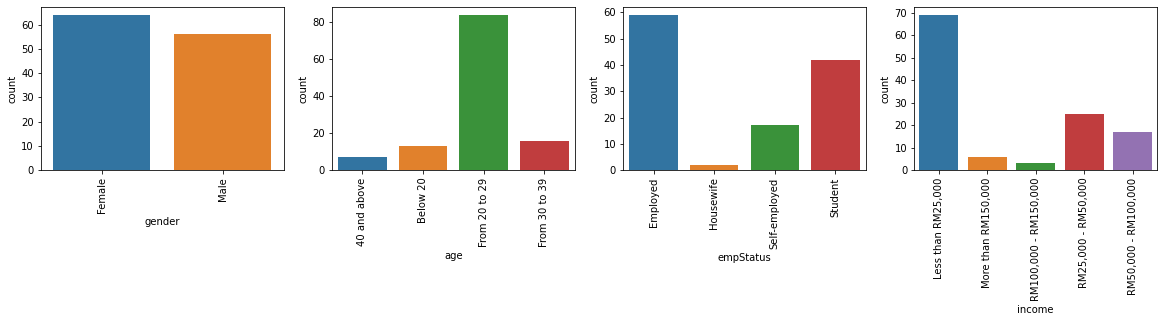

In [15]:
plot_columns(data, columns=['gender','age','empStatus','income'])

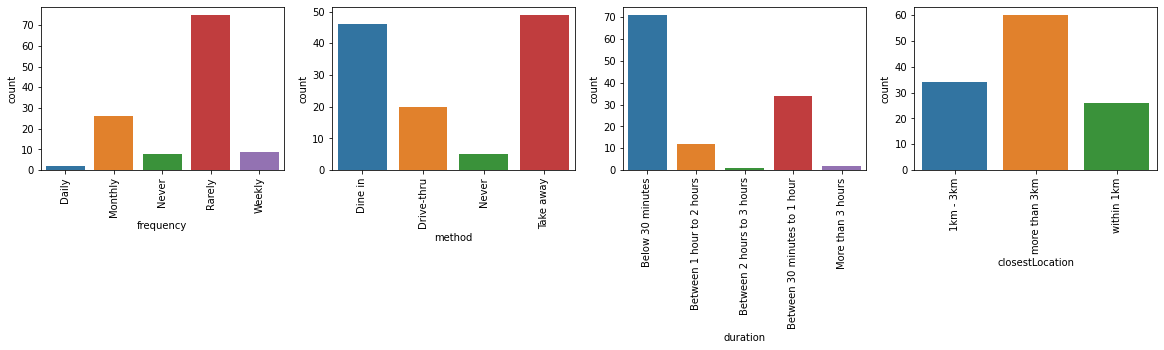

In [16]:
plot_columns(data, columns=['frequency','method','duration','closestLocation'])

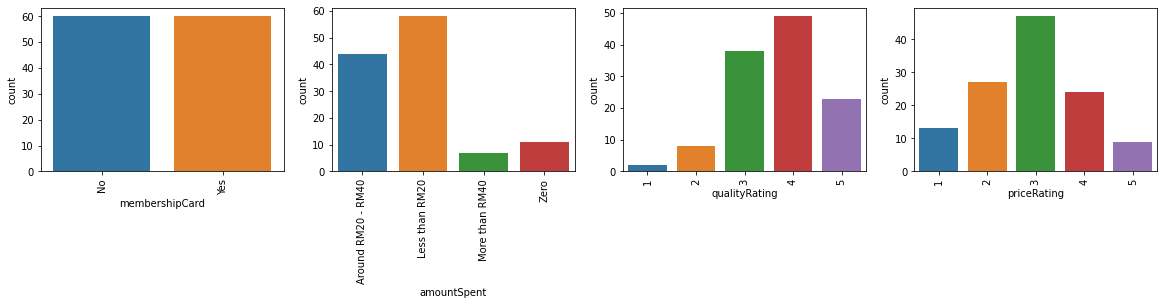

In [17]:
plot_columns(data, columns=['membershipCard', 'amountSpent', 'qualityRating', 'priceRating'])

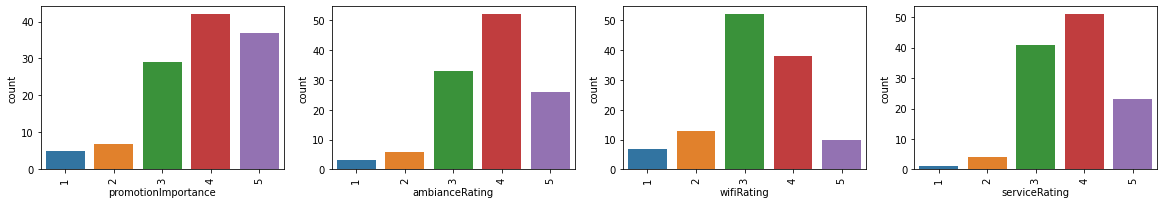

In [18]:
plot_columns(data, columns=[ 'promotionImportance', 'ambianceRating', 'wifiRating', 'serviceRating'])

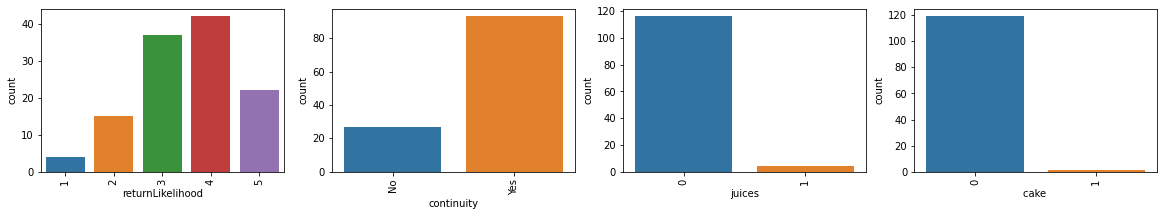

In [19]:
plot_columns(data,columns=['returnLikelihood', 'continuity', 'juices', 'cake '])

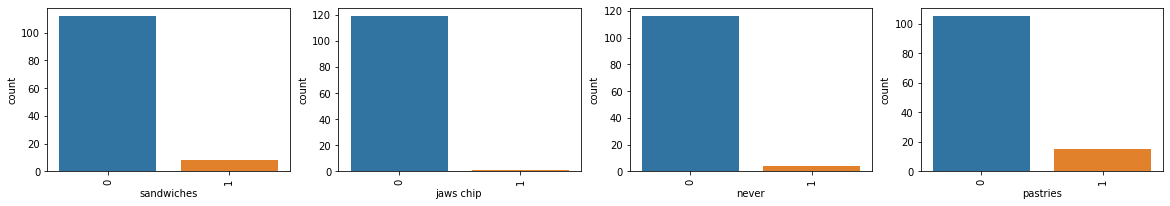

In [20]:
plot_columns(data, columns=['sandwiches', 'jaws chip ', 'never', 'pastries'])

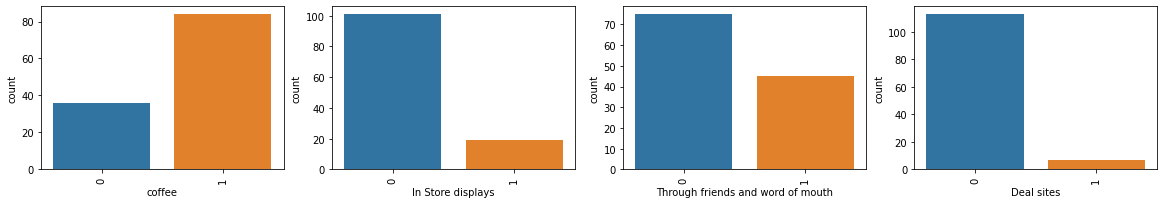

In [21]:
plot_columns(data, columns=['coffee', 'In Store displays', 'Through friends and word of mouth', 'Deal sites'])

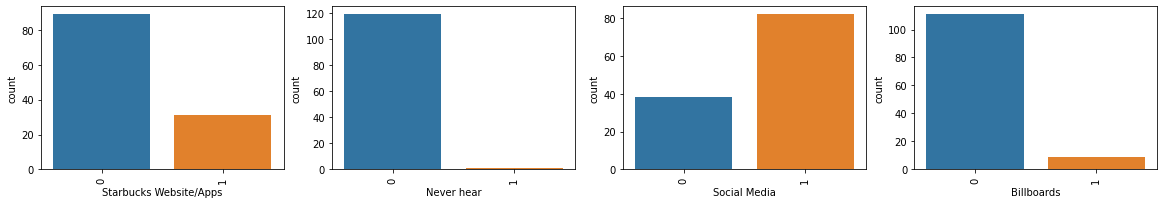

In [22]:
plot_columns(data, columns=['Starbucks Website/Apps', 'Never hear', 'Social Media', 'Billboards'])

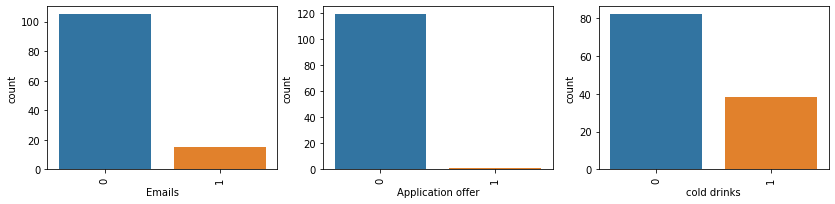

In [23]:
#since the last variables are not up to 4, I plotted the 3 together without the function
fig, ax = plt.subplots(1,3, figsize=(14,3))
j=0
for i in ['Emails','Application offer','cold drinks']:
  sns.countplot(x=i, data=data, ax=ax[j])
  ax[j].tick_params(axis='x',rotation=90)
  j+=1

**Findings & Decisions**
---
From the visualization,
* There are slightly more female than male that took the survey
* There are more people between the age of 20 - 29 that took the survey
* There are more Employed people, followed by Students that took the survey
* Most of the customers that partook of the survey earn less than 25000 Malaysia Rigmint.
* Most of the customers that partook of the survey use starbucks on a rare occasion
* Most of the customers that partook of the survey use starbucks through takeaway and dine in
* Majority of the customers that partook of the survey spend less than 30 minutes at starbucks
* Majority of the customers that partook of the survey have starbucks located at 3km away from their home
* There are equal number of customers with Membership Card and without Membership Card
* Majority of the customers that partook of the survey spend less than 20RM each time at starbucks
* There are more medium to high ratings for the quality, price, ambiance, wifi, and service
* Promotion affects the decision of most of the customers that partook the survey
* Majority of the customers will choose starbucks for other meetings
* Most of the customers are willing to continue using starbucks
* Most of the customers purchase coffee when they visit starbucks
* Most of the customers got to know starbucks through friends and social media

**Now I will explore the relationship between the continuity column which is our main focus and other columns**

In [24]:
#calculating the count of each variable across the continuity categories
bivar=[]
for i in data.drop('continuity', axis=1).columns:
    bivar.append(pd.crosstab(data["continuity"], data[i]))

In [25]:
#function for plotting relationship among variables
def plot_rel(data,rel=[]):
  fig, ax = plt.subplots(1,4, figsize=(20,3))
  j=0
  for i in rel:
    sns.heatmap(i, ax=ax[j], annot=True)
    j+=1

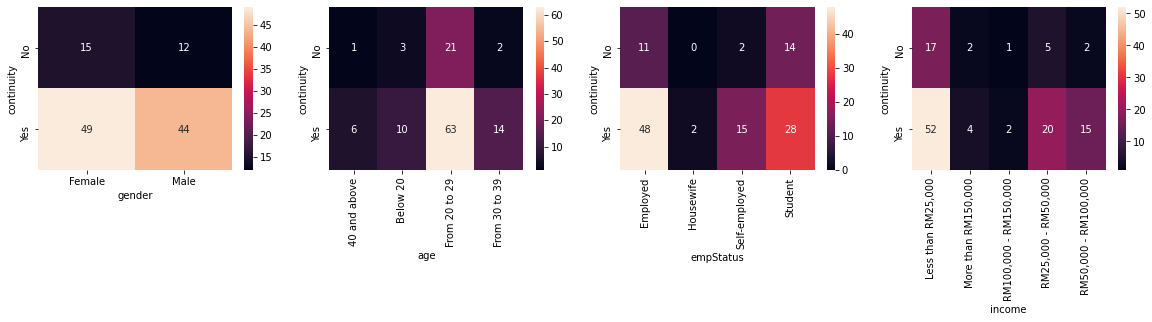

In [26]:
plot_rel(data, rel=bivar[0:4])

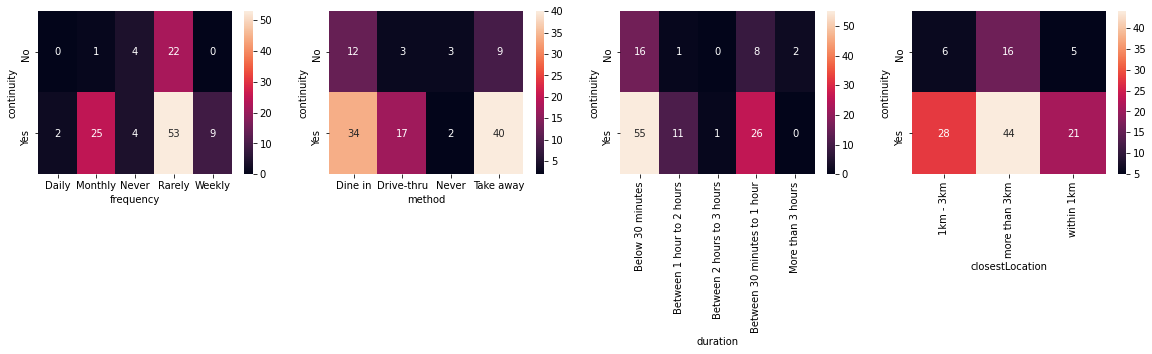

In [27]:
plot_rel(data, rel=bivar[4:8])

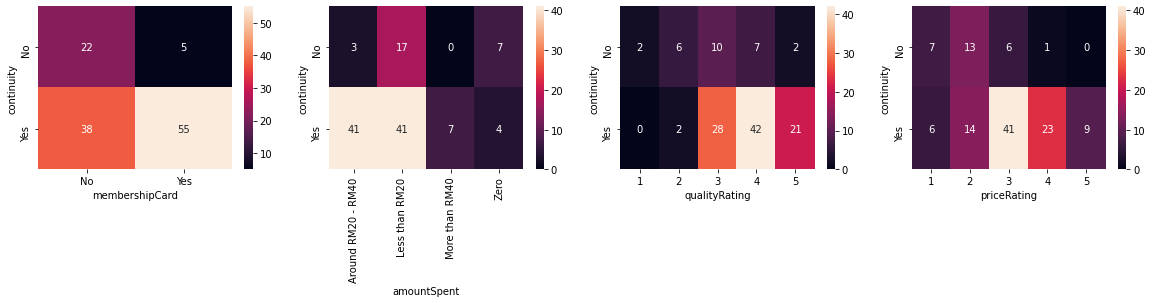

In [28]:
plot_rel(data, rel=bivar[8:12])

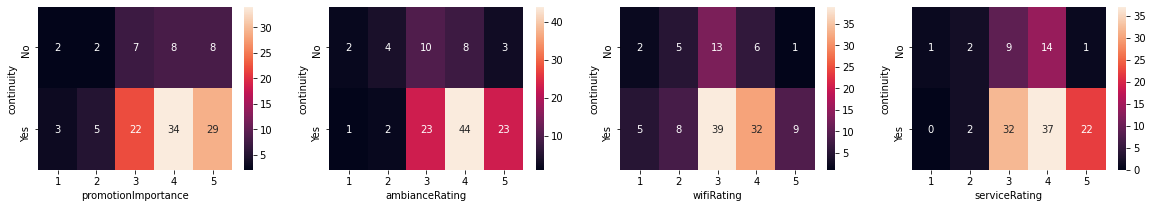

In [29]:
plot_rel(data, rel=bivar[12:16])

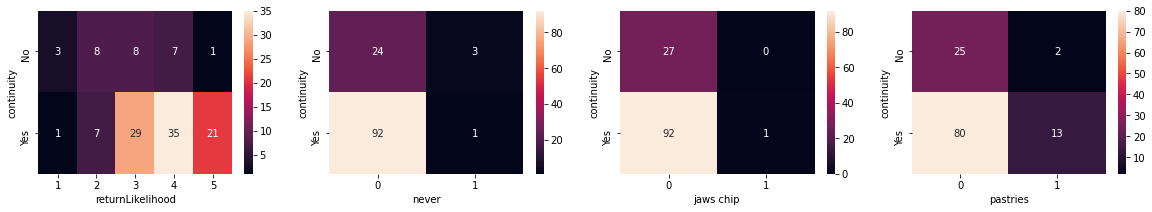

In [30]:
plot_rel(data, rel=bivar[16:20])

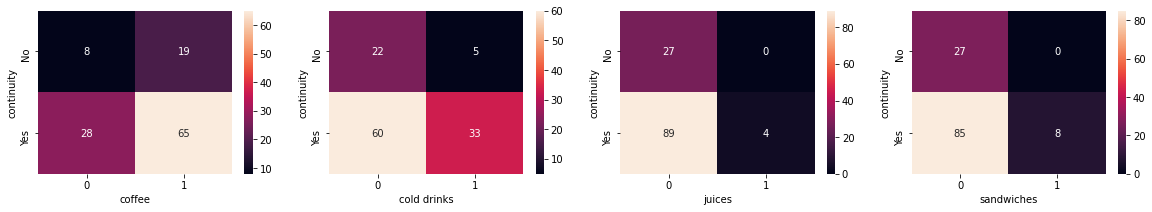

In [31]:
plot_rel(data, rel=bivar[20:24])

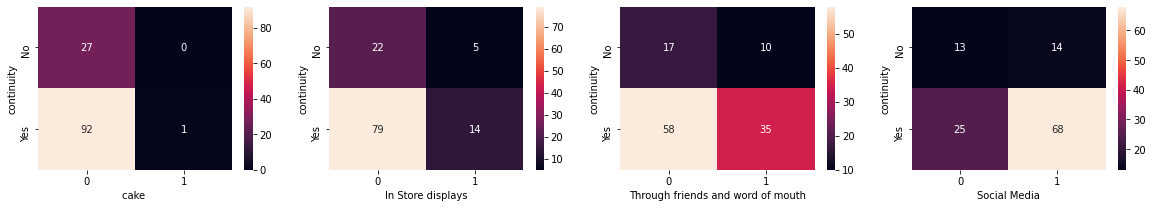

In [32]:
plot_rel(data, rel=bivar[24:28])

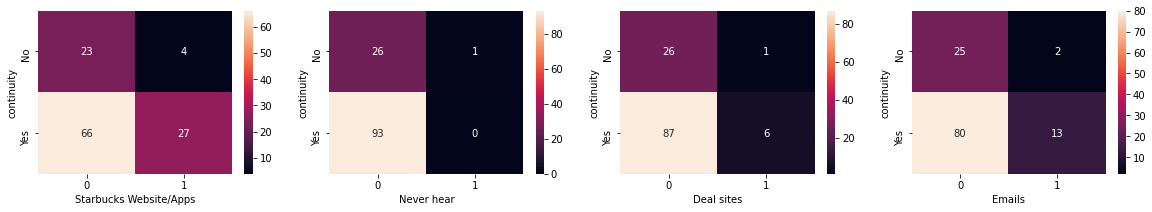

In [33]:
plot_rel(data, rel=bivar[28:32])

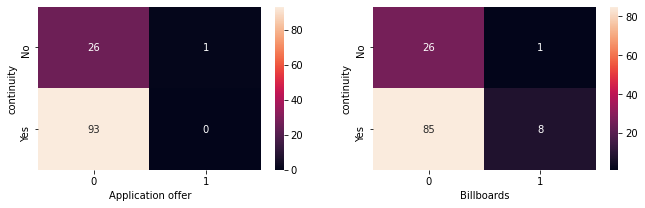

In [34]:
fig, ax = plt.subplots(1,2, figsize=(11,3))
j=0
for i in bivar[32:35]:
    sns.heatmap(i, ax=ax[j], annot=True)
    j+=1

**Findings & Decisions**
---
From the second visualization,
* There is a clear relationship between the ratings and continuity, As customers which gave lower ratings are most likely to stop using starbucks
* There is also a relationship between the amount spent and the continuity, As customers who spend leaa might tend to stop using starbucks